In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
# Load the split data
X_train = np.load('data/preproc_data/X_train.npy')
X_val = np.load('data/preproc_data/X_val.npy')
X_test = np.load('data/preproc_data/X_test.npy')
y_train = np.load('data/preproc_data/y_train.npy')
y_val = np.load('data/preproc_data/y_val.npy')
y_test = np.load('data/preproc_data/y_test.npy')

In [3]:
BATCH_SIZE = 32
EPOCHS = 15

In [4]:
def create_model_v1(num_classes):
    model_v1 = Sequential([
        Conv2D(32, (2, 2), input_shape=(224, 224, 3), padding='valid', name='Convolution-1', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-1'),

        Conv2D(64, (2, 2), padding='valid', name='Convolution-2', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-2'),

        Conv2D(128, (2, 2), padding='valid', name='Convolution-3', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-3'),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.25),

        Dense(num_classes, activation='softmax'),
    ])

    model_v1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model_v1

In [5]:
def create_model_v2(num_classes):
    model_v2 = Sequential([
    
        Conv2D(32, (3, 3), input_shape=(224, 224, 3), padding='valid', name='Convolution-1', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-1'),

        Conv2D(64, (3, 3), padding='valid', name='Convolution-2', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-2'),

        Conv2D(128, (2, 2), padding='valid', name='Convolution-3', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-3'),
        
        Conv2D(256, (2, 2), padding='valid', name='Convolution-4', activation='relu'),
        MaxPooling2D(pool_size=(2, 2), name='Pooling-4'),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.25),

        Dense(num_classes, activation='softmax'),
        ])

    model_v2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model_v2

In [6]:
def train_model(model, X_train, y_train, X_val, y_val):
    
    """
    This function trains a given model using the provided training and validation data. 
    It also applies early stopping to prevent overfitting.
    
    Args:
        model (keras.Model): The model to be trained.
        X_train (numpy.ndarray): Training data.
        y_train (numpy.ndarray): Training labels.
        X_val (numpy.ndarray): Validation data.
        y_val (numpy.ndarray): Validation labels.
    """
    
    es = EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train, 
        validation_data=(X_val, y_val), 
        epochs=EPOCHS, 
        batch_size=BATCH_SIZE, 
        callbacks=[es],
        shuffle = True)
    
    return history

In [7]:
model_v1 = create_model_v1(y_train.shape[1])
model_v1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution-1 (Conv2D)      (None, 223, 223, 32)      416       
                                                                 
 Pooling-1 (MaxPooling2D)    (None, 111, 111, 32)      0         
                                                                 
 Convolution-2 (Conv2D)      (None, 110, 110, 64)      8256      
                                                                 
 Pooling-2 (MaxPooling2D)    (None, 55, 55, 64)        0         
                                                                 
 Convolution-3 (Conv2D)      (None, 54, 54, 128)       32896     
                                                                 
 Pooling-3 (MaxPooling2D)    (None, 27, 27, 128)       0         
                                                                 
 flatten (Flatten)           (None, 93312)             0

In [8]:
history_v1 = train_model(model_v1, X_train, y_train, X_val, y_val)

Epoch 1/15
60/60 [==============================] - 14s 224ms/step - loss: 2.0435 - accuracy: 0.2974 - val_loss: 1.5620 - val_accuracy: 0.4272
Epoch 2/15
60/60 [==============================] - 13s 218ms/step - loss: 1.2770 - accuracy: 0.5450 - val_loss: 0.8751 - val_accuracy: 0.6864
Epoch 3/15
60/60 [==============================] - 13s 215ms/step - loss: 0.6501 - accuracy: 0.7968 - val_loss: 0.5110 - val_accuracy: 0.8222
Epoch 4/15
60/60 [==============================] - 13s 216ms/step - loss: 0.3326 - accuracy: 0.8810 - val_loss: 0.3978 - val_accuracy: 0.8568
Epoch 5/15
60/60 [==============================] - 13s 217ms/step - loss: 0.2018 - accuracy: 0.9354 - val_loss: 0.3699 - val_accuracy: 0.8691
Epoch 6/15
60/60 [==============================] - 13s 219ms/step - loss: 0.1619 - accuracy: 0.9413 - val_loss: 0.3215 - val_accuracy: 0.8864
Epoch 7/15
60/60 [==============================] - 14s 226ms/step - loss: 0.0931 - accuracy: 0.9635 - val_loss: 0.3296 - val_accuracy: 0.8914

In [9]:
model_v1.evaluate(X_test, y_test)

13/13 [==============================] - 1s 55ms/step - loss: 0.3052 - accuracy: 0.8988


[0.3052217364311218, 0.8987654447555542]

In [10]:
model_v1.save('model/model_v1.h5')
pd.DataFrame(history_v1.history).to_csv('model/history_v1.csv', index=False)

/Users/argishtiovsepyan/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


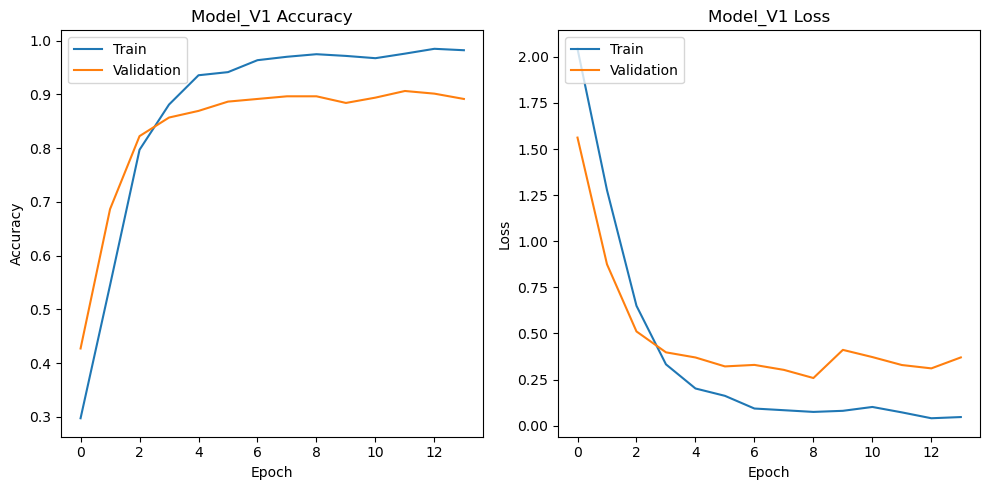

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_v1.history['accuracy'])
plt.plot(history_v1.history['val_accuracy'])
plt.title('Model_V1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_v1.history['loss'])
plt.plot(history_v1.history['val_loss'])
plt.title('Model_V1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [12]:
model_v2 = create_model_v2(y_train.shape[1])
model_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution-1 (Conv2D)      (None, 222, 222, 32)      896       
                                                                 
 Pooling-1 (MaxPooling2D)    (None, 111, 111, 32)      0         
                                                                 
 Convolution-2 (Conv2D)      (None, 109, 109, 64)      18496     
                                                                 
 Pooling-2 (MaxPooling2D)    (None, 54, 54, 64)        0         
                                                                 
 Convolution-3 (Conv2D)      (None, 53, 53, 128)       32896     
                                                                 
 Pooling-3 (MaxPooling2D)    (None, 26, 26, 128)       0         
                                                                 
 Convolution-4 (Conv2D)      (None, 25, 25, 256)      

In [13]:
history_v2 = train_model(model_v2, X_train, y_train, X_val, y_val)

Epoch 1/15
60/60 [==============================] - 21s 347ms/step - loss: 1.9505 - accuracy: 0.2915 - val_loss: 1.6262 - val_accuracy: 0.3704
Epoch 2/15
60/60 [==============================] - 20s 337ms/step - loss: 1.3120 - accuracy: 0.5116 - val_loss: 0.9598 - val_accuracy: 0.6321
Epoch 3/15
60/60 [==============================] - 20s 341ms/step - loss: 0.8184 - accuracy: 0.7111 - val_loss: 0.6017 - val_accuracy: 0.8049
Epoch 4/15
60/60 [==============================] - 21s 345ms/step - loss: 0.4787 - accuracy: 0.8243 - val_loss: 0.7971 - val_accuracy: 0.7086
Epoch 5/15
60/60 [==============================] - 21s 343ms/step - loss: 0.3830 - accuracy: 0.8519 - val_loss: 0.4651 - val_accuracy: 0.8049
Epoch 6/15
60/60 [==============================] - 20s 336ms/step - loss: 0.2376 - accuracy: 0.9111 - val_loss: 0.3629 - val_accuracy: 0.8617
Epoch 7/15
60/60 [==============================] - 21s 342ms/step - loss: 0.1649 - accuracy: 0.9354 - val_loss: 0.3657 - val_accuracy: 0.8864

In [14]:
model_v2.evaluate(X_test, y_test)

13/13 [==============================] - 1s 89ms/step - loss: 0.3206 - accuracy: 0.8840


[0.320556640625, 0.8839505910873413]

In [15]:
model_v2.save('model/model_v2.h5')
pd.DataFrame(history_v2.history).to_csv('model/history_v2.csv', index=False)

/Users/argishtiovsepyan/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


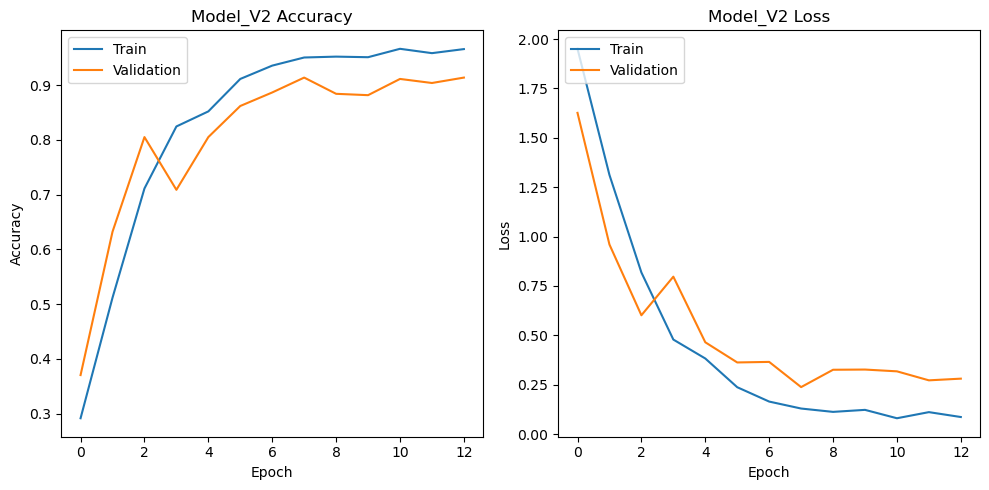

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_v2.history['accuracy'])
plt.plot(history_v2.history['val_accuracy'])
plt.title('Model_V2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_v2.history['loss'])
plt.plot(history_v2.history['val_loss'])
plt.title('Model_V2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()